## E&M: Standard EM3

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Electric Field Magnitude at Top Surface of Dielectric (z = 1.0): 1.48e-09 N/C
Electric Field Magnitude at Bottom Surface of Dielectric (z = -1.0): 1.48e-09 N/C
Electric Field Magnitude Inside Dielectric (z = 0.0): 9.51e-10 N/C


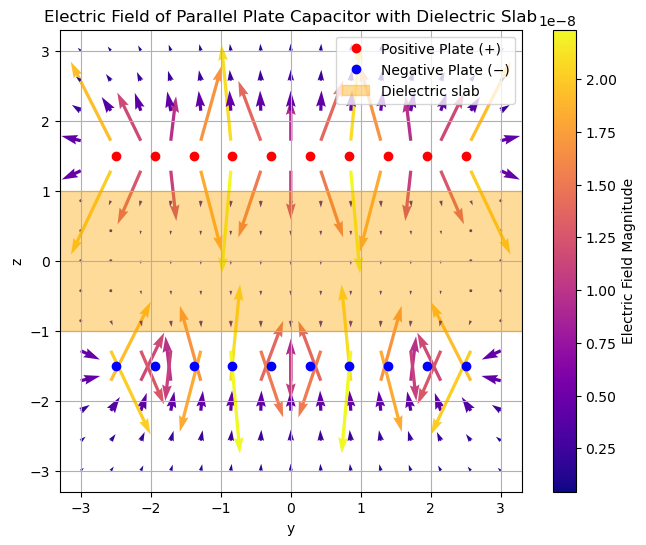

In [105]:

# constant & parameters
k = 9.0E9 # rounded columbs constant
plate_len = 5 
plate_sep = 3 
num_charge = 10
q = 1.0E-19 # mag charge for each point 
x_fixed = 0.0 
epsilon = 4.0 # dielectric constant for glass

# dielectric material location
die_thick = 2.0
die_z = die_thick / 2 

# plate charge location
y_plate = np.linspace(-plate_len / 2, plate_len / 2, num_charge)

# plate 1 (top, +q)
charge_top = [(x_fixed, y, plate_sep / 2, +q) for y in y_plate]

# plate 2 (bottom, -q)
charge_bot = [(x_fixed, y,  -plate_sep / 2, -q) for y in y_plate]

# combine charges
charges = charge_top + charge_bot

# grid for field calculation
y_vals = np.linspace(-3, 3, 15)
z_vals = np.linspace(-3, 3, 15)
Y, Z = np.meshgrid(y_vals, z_vals)

# initialize field components
Ey = np.zeros_like(Y)
Ez = np.zeros_like(Z)

# function to compute electric field from a point charge
def E_field_yz(q, xq, yq, zq, y, z):
    dx = x_fixed - xq
    dy = y - yq
    dz = z - zq
    r_squared = dx**2 + dy**2 + dz**2 + 1e-10  # small term to prevent division by zero
    r = np.sqrt(r_squared)
    E_mag = k * q / r_squared  # magnitude 
    return E_mag * dy / r, E_mag * dz / r  # components

# sum fields from all point charges
for xq, yq, zq, q in charges:
    dEy, dEz = E_field_yz(q, xq, yq, zq, Y, Z)
    #print("dEy: ", dEy, "\ndEz:", dEz)
    die_in = (Z >= -die_z) & (Z <= die_z) # apply dielectric effect only in the material
    Ey += np.where(die_in, dEy / epsilon, dEy)
    Ez += np.where(die_in, dEz / epsilon, dEz)
    
# compute E_mag again with componets for quiver
E_mag_quiver = np.sqrt(Ey**2 + Ez**2) 

# identify sample locations along y=0 to print E_mag 
sample_y_index = np.argmin(np.abs(y_vals - 0))

# define top and bottom surface locations of dielectric
die_top_z = die_z
die_bot_z = -die_z
die_in_z = 0.0 # sample point inside material at z=0

# find indecies in z grid for z values
z_index_top = np.argmin(np.abs(z_vals - die_top_z))
z_index_bot = np.argmin(np.abs(z_vals - die_bot_z))
z_index_mid = np.argmin(np.abs(z_vals - die_in_z))

# get E-field magnitude at sample locations
E_top = E_magnitude[z_index_top, sample_y_index]
E_bot = E_magnitude[z_index_bot, sample_y_index]
E_mid = E_magnitude[z_index_mid, sample_y_index]

print(f"Electric Field Magnitude at Top Surface of Dielectric (z = {die_top_z}): {E_top:.2e} N/C")
print(f"Electric Field Magnitude at Bottom Surface of Dielectric (z = {die_bot_z}): {E_bot:.2e} N/C")
print(f"Electric Field Magnitude Inside Dielectric (z = {die_in_z}): {E_mid:.2e} N/C")

# setup plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot( y_plate , [plate_sep / 2] * num_charge, 'ro', label='Positive Plate (+)') # draw top plate 
ax.plot( y_plate, [-plate_sep / 2] * num_charge, 'bo', label='Negative Plate (−)') # draw bottom plate
quiver = ax.quiver(Y, Z, Ey, Ez, E_mag_quiver, cmap='plasma', scale=1E-7, width=0.007)
cbar = fig.colorbar(quiver, ax=ax)
cbar.set_label('Electric Field Magnitude')
ax.set_title("Electric Field of Parallel Plate Capacitor with Dielectric Slab")
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.set_aspect('equal')
ax.axhspan(-die_z, die_z, color='orange', alpha=0.4, label='Dielectric slab')
ax.legend()
plt.grid(True)
plt.show()



In [126]:
# show Ey and Ez along a path from below the bottom plate to above the top plate
z_walk_vals = np.linspace(-2, 2, 500)  # walking from below to above plates
Ey_walk = np.zeros_like(z_walk_vals)
Ez_walk = np.zeros_like(z_walk_vals)

for i, z in enumerate(z_walk_vals):
    Ey_sum, Ez_sum = 0, 0
    for xq, yq, zq, q in charges:
        dEy, dEz = E_field_yz(q, xq, yq, zq, 0, z)  # calculate field at y=0
        Ey_sum += dEy
        Ez_sum += dEz

    # apply dielectric effect when inside material
    if -die_z <= z <= die_z:
        Ey_walk[i] = Ey_sum / epsilon
        Ez_walk[i] = Ez_sum / epsilon
    else:
        Ey_walk[i] = Ey_sum
        Ez_walk[i] = Ez_sum


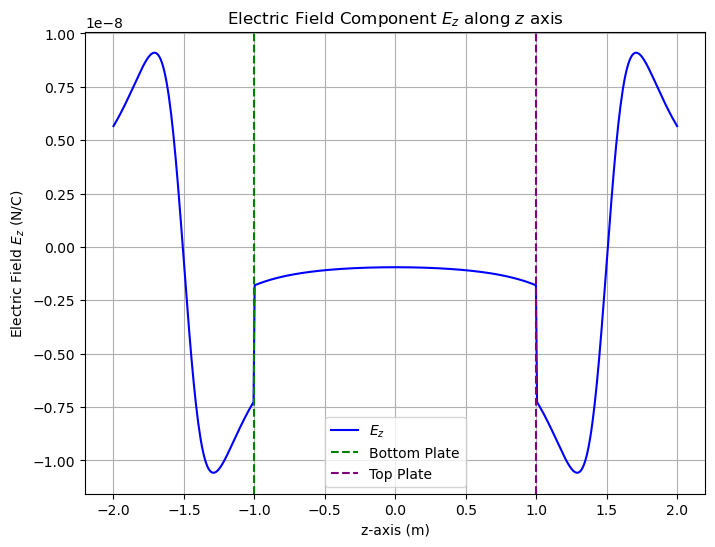

In [130]:
# plot Ez as a function of z 
plt.figure(figsize=(8, 6))
plt.plot(z_walk_vals, Ez_walk, label=r'$E_z$', color='b')
plt.title('Electric Field Component $E_z$ along $z$ axis')
plt.xlabel('z-axis (m)')
plt.ylabel('Electric Field $E_z$ (N/C)')
plt.axvline(x=-1, color='g', ls='--', label='Bottom Plate')
plt.axvline(x=1, color='purple', ls='--', label='Top Plate')
plt.legend()
plt.grid(True)
plt.show()


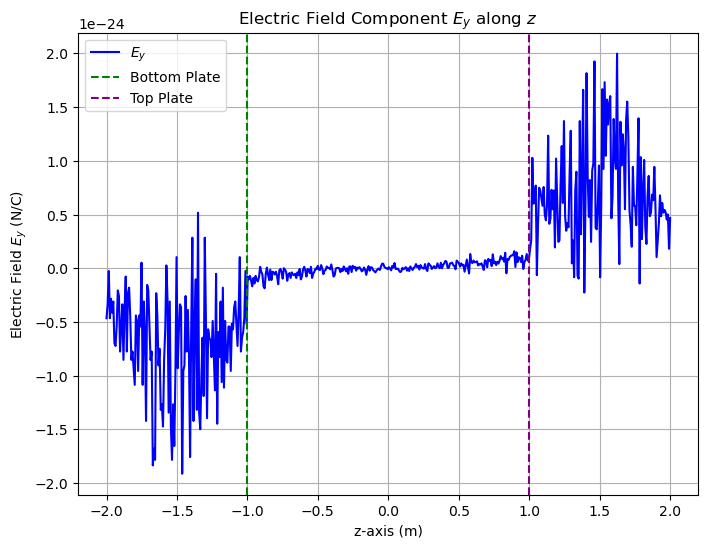

In [131]:
# plot Ey as a function of z 
plt.figure(figsize=(8, 6))
plt.plot(z_walk_vals, Ey_walk, label=r'$E_y$', color='b')
plt.title('Electric Field Component $E_y$ along $z$')
plt.xlabel('z-axis (m)')
plt.ylabel('Electric Field $E_y$ (N/C)')
plt.axvline(x=-1, color='g', ls='--', label='Bottom Plate')
plt.axvline(x=1, color='purple', ls='--', label='Top Plate')
plt.legend()
plt.grid(True)
plt.show()